In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tqdm
import matplotlib.pyplot as plt

import glob
from pathlib import Path

from scipy.stats import pearsonr

## Load Bacterial SwissProt

In [2]:
swiss_df = pd.read_hdf('../data/bacterial_swissprot.h5')
swiss_df.head()

,accessions,sequence_length,sequence,description,InterPro,GO,KO,Gene3D,Pfam,KEGG,...,Superkingdom,Kingdom,Phylum,Class,Order,Family,Subfamily,Genus,Species,Transmembrane
entry_name,,,,,,,,,,,,,,,,,,,,,
12AH_CLOS4,P21215,29.0,MIFDGKVAIITGGGKAKSIGYGIAVAYAK,RecName: Full=12-alpha-hydroxysteroid dehydrog...,IPR036291,GO:0047013||GO:0030573||GO:0016042,NaN,NaN,NaN,NaN,...,Bacteria,NaN,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,NaN,Clostridium,NaN,0.0
12KD_MYCSM,P80438,24.0,MFHVLTLTYLCPLDVVXQTRPAHV,RecName: Full=12 kDa protein; Flags: Fragment;,NaN,NaN,NaN,NaN,NaN,NaN,...,Bacteria,NaN,Actinobacteria,Actinobacteria,Corynebacteriales,Mycobacteriaceae,NaN,Mycolicibacterium,NaN,0.0
12OLP_LISIN,Q92AT0,1086.0,MTMLKEIKKADLSAAFYPSGELAWLKLKDIMLNQVIQNPLENRLSQ...,"RecName: Full=1,2-beta-oligoglucan phosphoryla...",IPR008928||IPR012341||IPR033432,GO:0016740,K21298,1.50.10.10,PF17167,lin:lin1839,...,Bacteria,NaN,Firmicutes,Bacilli,Bacillales,Listeriaceae,NaN,Listeria,NaN,NaN
12S_PROFR,Q8GBW6||Q05617,611.0,MAENNNLKLASTMEGRVEQLAEQRQVIEAGGGERRVEKQHSQGKQT...,RecName: Full=Methylmalonyl-CoA carboxyltransf...,IPR034733||IPR000438||IPR029045||IPR011763||IP...,GO:0009317||GO:0003989||GO:0047154||GO:0006633,NaN,NaN,PF01039,NaN,...,Bacteria,NaN,Actinobacteria,Actinobacteria,Propionibacteriales,Propionibacteriaceae,NaN,Propionibacterium,NaN,0.0
14KD_MYCBO,P0A5B8||A0A1R3Y251||P30223||X2BJK6,144.0,MATTLPVQRHPRSLFPEFSELFAAFPSFAGLRPTFDTRLMRLEDEM...,RecName: Full=14 kDa antigen; AltName: Full=16...,IPR002068||IPR008978,GO:0005618||GO:0005576,NaN,2.60.40.790,PF00011,NaN,...,Bacteria,NaN,Actinobacteria,Actinobacteria,Corynebacteriales,Mycobacteriaceae,NaN,Mycobacterium,NaN,0.0


## Load Label Recovery Results

In [3]:
def read_results(results_path):
    results_path = Path(results_path)

    return pd.concat({
        (repeat, path.stem): pd.read_pickle(path) 
        for repeat in range(1)
        for path in results_path.glob(f'repeat_{repeat}/*.pkl')
    }, names=['Repeat', 'Label', 'id']).reset_index()

In [4]:
taxonomic_labels = ['Phylum', 'Genus', 'Order', 'Family']

rec_results = read_results(f'../01-label-recovery/fixed_deep_embeddings/')
rec_results = rec_results.query('Label not in @taxonomic_labels')
rec_results.head()

,Repeat,Label,id,entry_name,Metric,Value,k
0,0,InterPro,0,14KL_OCHA4,IoU,1.0,1
1,0,InterPro,1,17KD_RICPR,IoU,1.0,1
2,0,InterPro,2,18K1_MYCAV,IoU,1.0,1
3,0,InterPro,3,18K2_MYCAV,IoU,1.0,1
4,0,InterPro,4,18K2_MYCIT,IoU,1.0,1


In [5]:
swiss_df['REE'] = 1 - rec_results.groupby('entry_name')['Value'].mean()

In [25]:
taxonomic_labels = ['Phylum', 'Genus', 'Order', 'Family']

rec_results = read_results(f'../01-label-recovery/fixed_mmseqs2/')
rec_results = rec_results.query('Label not in @taxonomic_labels')
rec_results.head()

,Repeat,Label,id,entry_name,Metric,Value,k
0,0,GO,0,14KL_BRUA1,IoU,1.0,1
1,0,GO,1,17KD_RICFE,IoU,1.0,1
2,0,GO,2,17KD_RICTY,IoU,1.0,1
3,0,GO,3,1A1D_ACIET,IoU,1.0,1
4,0,GO,4,1A1D_AGRRK,IoU,1.0,1


In [26]:
swiss_df['REE_mmseqs2'] = 1 - rec_results.groupby('entry_name')['Value'].mean()

In [27]:
swiss_df[['REE', 'REE_mmseqs2']].corr()

,REE,REE_mmseqs2
REE,1.000000,0.840919
REE_mmseqs2,0.840919,1.000000


In [45]:
swiss_df.query('REE_mmseqs2 > 0.6 and REE < 0.4')

,accessions,sequence_length,sequence,description,InterPro,GO,KO,Gene3D,Pfam,KEGG,...,SUPFAM_count,EC number_count,Gene3D_count,log_averaged_class_size,is_uncharacterized,is_putative,is_probable,is_known,REE_cat,REE_mmseqs2
entry_name,,,,,,,,,,,,,,,,,,,,,
HMW3_MYCGA,Q7NBT3,1076.0,MIMNPKIHNKILKNLAKLKKKVFTKYAAYDFNFAYDKNGNVYLVGV...,RecName: Full=Cytadherence high molecular weig...,NaN,GO:0033111||GO:0042995||GO:0005886||GO:0020035...,NaN,NaN,NaN,mga:MGA_0928,...,NaN,NaN,NaN,1.791759,False,False,False,Known,0.3-0.4,0.876867
INCG_CHLTR,P0DPS6||O84120||Q9RPP8,167.0,MICCDKVLSSVQSMPVIDKCSVTKCLQTAKQAAVLALSLFAVFASG...,RecName: Full=Inclusion membrane protein G;,NaN,GO:0005576||GO:0033644||GO:0016021||GO:0140221...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.386294,False,False,False,Known,0.3-0.4,0.896645
Y159_UREPA,Q9PQY5,182.0,MMNNKNKFKNKEWKFSKKQVQLIYLTSSIISGLFLGLALLSTYLIA...,RecName: Full=Uncharacterized protein UU159;,NaN,GO:0016021||GO:0005886,NaN,NaN,NaN,uur:UU159,...,NaN,NaN,NaN,7.668561,True,False,False,Unknown,0.3-0.4,0.768217
Y2049_BACHD,Q9KB79,222.0,MNKLEERSQHRKSRFRFLVISTFWRVLLLLKNDAEPLFHLGNIHYA...,RecName: Full=TPR repeat-containing protein BH...,IPR013026||IPR011990||IPR019734,NaN,NaN,1.25.40.10,NaN,bha:BH2049,...,141.0,NaN,223.0,4.354661,False,False,False,Known,0.3-0.4,0.721340
Y2265_MYCTO,P9WLG2||L0TC00||P64961||Q50697,409.0,MGANGDVALSRIGATRPALSAWRFVTVFGVVGLLADVVYEGARSIT...,RecName: Full=Uncharacterized protein MT2327;,IPR011701||IPR036259,GO:0016021||GO:0005886||GO:0055085,NaN,NaN,PF07690,mtc:MT2327,...,516.0,NaN,NaN,4.511447,True,False,False,Unknown,0.3-0.4,0.774872
Y320_MYCGE,P47562||Q49508,286.0,MINSTKGYIDQNGLAAKQFVQTKQLSVIRLTFMVAAFGIFFIFLVA...,RecName: Full=Uncharacterized protein MG320;,NaN,GO:0016021||GO:0005886,NaN,NaN,NaN,mge:MG_320,...,NaN,NaN,NaN,7.668561,True,False,False,Unknown,0.3-0.4,0.693416
YBFE_BACSU,O31445,94.0,MNHCLHSNTLAKIVCTVTLITLYFYFFSTRFNELIELAVQMFFALI...,RecName: Full=Uncharacterized protein YbfE;,NaN,GO:0016021||GO:0005886,NaN,NaN,NaN,bsu:BSU02180,...,NaN,NaN,NaN,7.668561,True,False,False,Unknown,0.3-0.4,0.767973
YBFF_BACSU,O31446,303.0,MKNDQIVFEKTKNIAHDINQMQNQQEIIDYLFRQDSLTLNQLKHYY...,RecName: Full=Uncharacterized protein YbfF;,NaN,GO:0016021||GO:0005886,NaN,NaN,NaN,bsu:BSU02190,...,NaN,NaN,NaN,7.668561,True,False,False,Unknown,0.3-0.4,0.692983
YDBL_BACSU,P96607,111.0,MRNFITALPIVLLLGFSFVSFMFQFEHLVYFRLALGLFSLVGLYMI...,RecName: Full=Uncharacterized protein YdbL;,NaN,GO:0016021||GO:0005886,NaN,NaN,NaN,bsu:BSU04510,...,NaN,NaN,NaN,7.668561,True,False,False,Unknown,0.3-0.4,0.671201


<AxesSubplot:xlabel='REE', ylabel='REE_mmseqs2'>

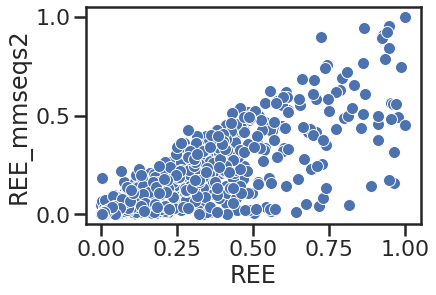

In [41]:
sns.scatterplot(
    data=swiss_df.sample(1000),
    x='REE',
    y='REE_mmseqs2'
)

In [6]:
annotations = [
    'InterPro',
    'GO',
    'KO',
    'Pfam',
    'SUPFAM',
    'EC number',
    'Gene3D',
]

## Count log-averaged size of the functional classes

In [46]:
a_counts = []
for a in annotations:
    name = f'{a}_count'
    swiss_df[name] = swiss_df[a].map(swiss_df[a].value_counts().to_dict())
    
    a_counts.append(name)

In [47]:
swiss_df['log_averaged_class_size'] = np.log(swiss_df[a_counts]).mean(axis=1)

In [48]:
sdf = swiss_df[swiss_df['log_averaged_class_size'].notnull() & swiss_df['REE'].notnull()]
r, p = pearsonr(sdf['log_averaged_class_size'], sdf['REE'])

print(f'Pearson R: {r}, p-value: {p}, N: {len(sdf)}')

Pearson R: -0.7759106642657742, p-value: 0.0, N: 200115


### Plot 

/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x576 with 0 Axes>

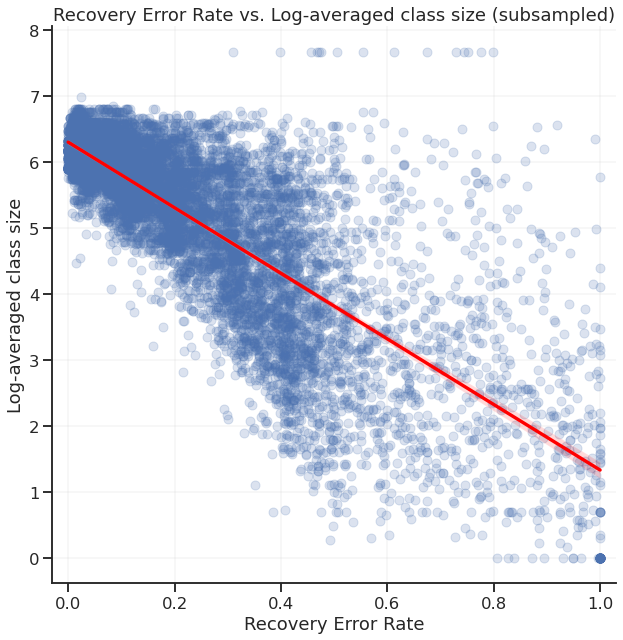

In [49]:
sns.set('talk', 'ticks')
plt.figure(figsize=(12,8))
# sns.histplot(swiss_df, x="rec_error", y="mean_class_size")
sns.lmplot(data=swiss_df.sample(10000), x="REE", y="log_averaged_class_size", size=9, scatter_kws=dict(alpha=0.2), ci=99, line_kws=dict(color='red'))
plt.xlim(-0.03, 1.03)

plt.title('Recovery Error Rate vs. Log-averaged class size (subsampled)')
plt.xlabel('Recovery Error Rate')
plt.ylabel('Log-averaged class size')
plt.grid(alpha=0.2)

## Unknown words

In [50]:
swiss_df['is_uncharacterized'] = swiss_df['description'].str.lower().str.contains('uncharacterized')
swiss_df['is_putative'] = swiss_df['description'].str.lower().str.contains('putative')
swiss_df['is_probable'] = swiss_df['description'].str.lower().str.contains('probable')

In [51]:
swiss_df['is_known'] = ((swiss_df['is_uncharacterized'] + swiss_df['is_putative'] + swiss_df['is_probable']).astype('float') > 0).map({True: 'Unknown',  False: "Known"})

In [52]:
n_labels = 10
labels = [f'{i/n_labels}-{(i+1)/n_labels}' for i in range(n_labels)]
swiss_df['REE_cat'] = pd.cut(swiss_df['REE'], n_labels, labels=labels)

In [53]:
counts = swiss_df.groupby('REE_cat')['is_known'].value_counts().unstack()

counts['putative'] = swiss_df.groupby('REE_cat')['is_putative'].value_counts().unstack()[True]
counts['probable'] = swiss_df.groupby('REE_cat')['is_probable'].value_counts().unstack()[True]
counts['uncharacterized'] = swiss_df.groupby('REE_cat')['is_uncharacterized'].value_counts().unstack()[True]

counts['total'] = counts['Known'] + counts['Unknown']
counts['unknown_prc'] = counts['Unknown'] / counts['total'] * 100
counts['putative_prc'] = counts['putative'] / counts['total'] * 100
counts['probable_prc'] = counts['probable'] / counts['total'] * 100
counts['uncharacterized_prc'] = counts['uncharacterized'] / counts['total'] * 100
# counts = counts.reset_index().melt(id_vars=['rec_cat'], value_vars=['unknown_prc'] value_name='count')
counts

is_known,Known,Unknown,putative,probable,uncharacterized,total,unknown_prc,putative_prc,probable_prc,uncharacterized_prc
REE_cat,,,,,,,,,,
0.0-0.1,64484,793,175,618,NaN,65277,1.214823,0.268088,0.946735,NaN
0.1-0.2,36208,1954,804,1142,8.0,38162,5.120277,2.106808,2.992506,0.020963
0.2-0.3,26740,1464,641,657,166.0,28204,5.190753,2.272727,2.329457,0.588569
0.3-0.4,23936,2691,849,1416,427.0,26627,10.106283,3.188493,5.317910,1.603635
0.4-0.5,17472,3023,1029,946,1055.0,20495,14.749939,5.020737,4.615760,5.147597
0.5-0.6,5659,1534,486,326,734.0,7193,21.326289,6.756569,4.532184,10.204365
0.6-0.7,3221,946,276,188,488.0,4167,22.702184,6.623470,4.511639,11.711063
0.7-0.8,2398,825,219,133,482.0,3223,25.597270,6.794912,4.126590,14.955011
0.8-0.9,1990,858,190,111,560.0,2848,30.126404,6.671348,3.897472,19.662921


In [54]:
counts = counts.reset_index().melt(
    id_vars=['REE_cat'],
    var_name='kind',
    value_vars=['unknown_prc', 'putative_prc', 'probable_prc', 'uncharacterized_prc'],
    value_name='prc'
)

In [55]:
palette = [
    "#8d5eac",
    "#3b66b6",
    "#d3759e",
    "#2fc7bd",
]

In [78]:
counts

,REE_cat,kind,prc
0,0.0-0.1,unknown_prc,1.214823
1,0.1-0.2,unknown_prc,5.120277
2,0.2-0.3,unknown_prc,5.190753
3,0.3-0.4,unknown_prc,10.106283
4,0.4-0.5,unknown_prc,14.749939
5,0.5-0.6,unknown_prc,21.326289
6,0.6-0.7,unknown_prc,22.702184
7,0.7-0.8,unknown_prc,25.597270
8,0.8-0.9,unknown_prc,30.126404
9,0.9-1.0,unknown_prc,43.193277


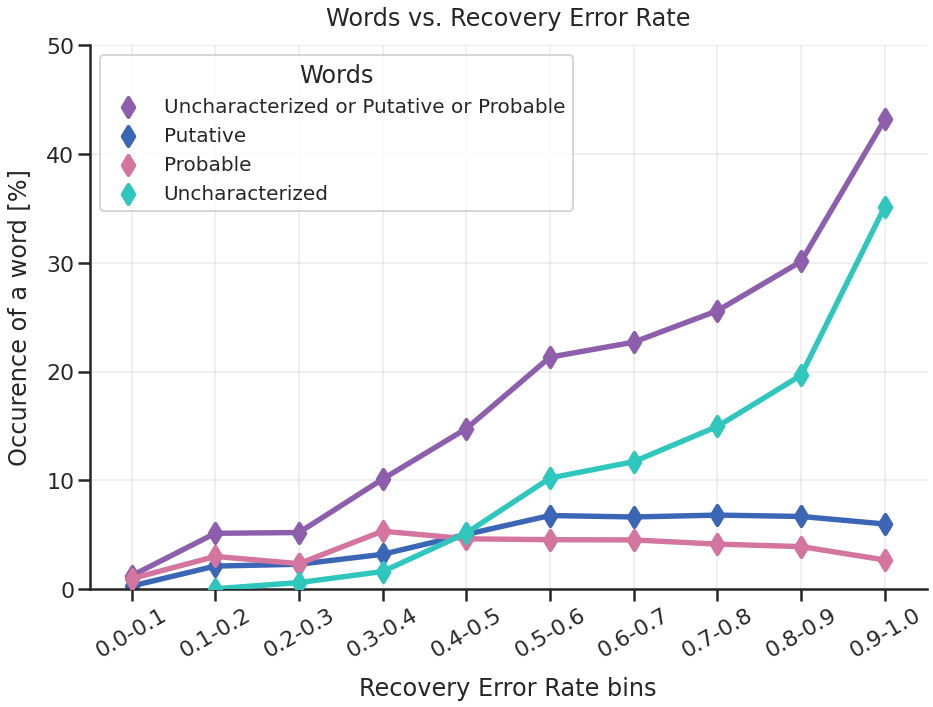

In [56]:
sns.set('poster', 'ticks')
plt.figure(figsize=(15, 10))
sns.pointplot(data=counts.reset_index(), x='REE_cat', y='prc', hue='kind', markers='d', palette=palette)
plt.grid(alpha=0.3)
sns.despine()
plt.xlabel('Recovery Error Rate bins', labelpad=15)
plt.ylabel('Occurence of a word [%]', labelpad=15)
plt.title('Words vs. Recovery Error Rate', pad=20)
plt.xticks(rotation=30)
plt.ylim(0, 50)

handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(
    title='Words',
    handles=handles,
    labels=['Uncharacterized or Putative or Probable', 'Putative' ,'Probable', 'Uncharacterized'],
    fontsize=20
#     loc=''
)

## Groupby Kegg level 2

In [73]:
kegg_df = (
    pd.read_excel(
        "KEGG_ko_to_K.xlsx",
        names=["KEGG", "level_1", "level_2", "level_3", "level_4"],
    )
    .drop("KEGG", axis=1)
    .iloc[:-7]
)

kegg_df.head()

,level_1,level_2,level_3,level_4
0,Metabolism,Carbohydrate metabolism,ko00010 Glycolysis / Gluconeogenesis,K00001 alcohol dehydrogenase [EC:1.1.1.1]
1,Metabolism,Carbohydrate metabolism,ko00010 Glycolysis / Gluconeogenesis,K00002 alcohol dehydrogenase (NADP+) [EC:1.1.1.2]
2,Metabolism,Carbohydrate metabolism,ko00010 Glycolysis / Gluconeogenesis,K00016 L-lactate dehydrogenase [EC:1.1.1.27]
3,Metabolism,Carbohydrate metabolism,ko00010 Glycolysis / Gluconeogenesis,K00114 alcohol dehydrogenase (cytochrome c) [E...
4,Metabolism,Carbohydrate metabolism,ko00010 Glycolysis / Gluconeogenesis,K00121 S-(hydroxymethyl)glutathione dehydrogen...


In [74]:
kegg_df['level_4'] = kegg_df['level_4'].str.split(' ', 1).str[0]

In [75]:
swiss_kg = swiss_df.merge(kegg_df, left_on='KO', right_on='level_4')

In [76]:
swiss_kg.groupby('level_1')['REE'].agg(['mean', 'std'])

,mean,std
level_1,,
Brite Hierarchies,0.345472,0.263484
Cellular Processes,0.308182,0.235179
Environmental Information Processing,0.326218,0.170758
Genetic Information Processing,0.118014,0.141131
Human Diseases,0.257472,0.270241
Metabolism,0.214342,0.173859
Not Included in Pathway or Brite,0.351780,0.207183
Organismal Systems,0.094625,0.155083


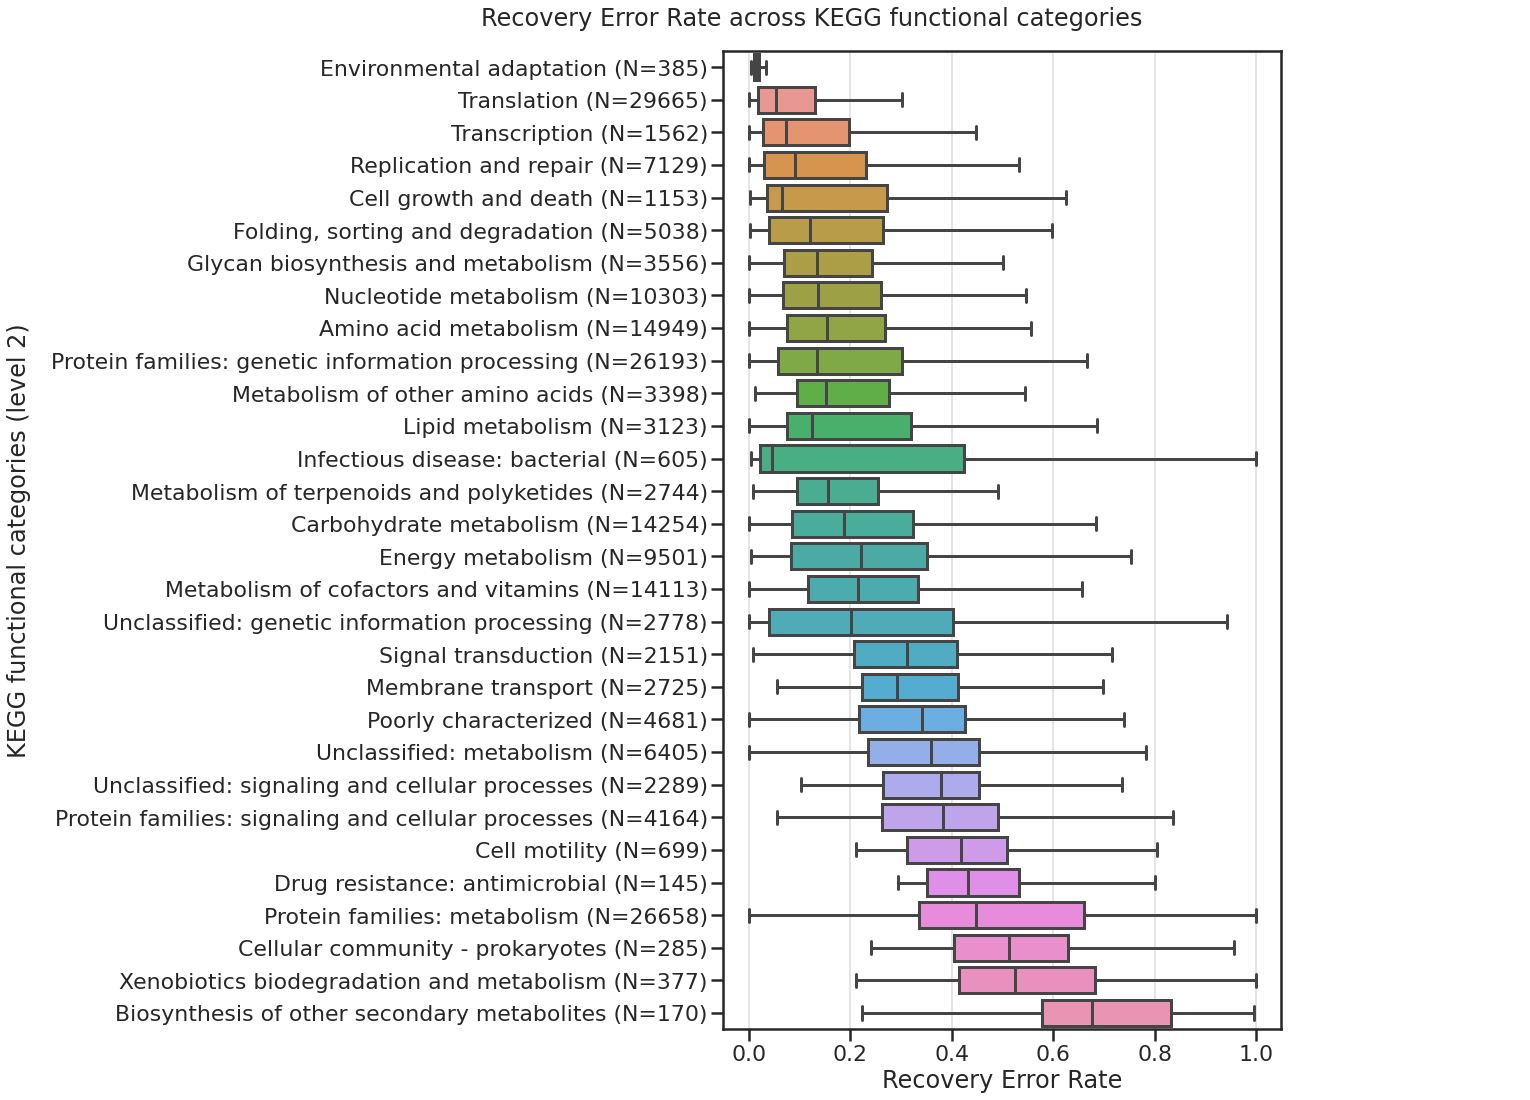

In [77]:
level = 'level_2'

level_counts = swiss_kg[level].value_counts()
level_means = swiss_kg.groupby(level)['REE'].mean()

filtered = level_counts[level_counts > 100].index

plt.figure(figsize=(10,18))
sns.boxplot(
    data=swiss_kg,
    x='REE',
    y=level,
    showfliers=False,
    order=level_means.loc[filtered].sort_values().index
    # cut=0,
    # scale='width',
    # width=0.9,
    # inner=None
)
plt.grid(axis='x', alpha=0.5)
plt.xlabel('Recovery Error Rate')
plt.ylabel(f'KEGG functional categories ({level.replace("_", " ")})', labelpad=20)
plt.title('Recovery Error Rate across KEGG functional categories                                                  ', pad=25, ha='center')

labels = [item.get_text() for item in plt.gca().get_yticklabels()]
plt.gca().set_yticklabels([
    f"{label} (N={level_counts.loc[label]})"
    for label in labels
]);